# Artificial Neural Networks: The simple Perceptron

<a href="https://mybinder.org/v2/gh/correll/deep-learning/master">Launch this notebook interactively</a> <img src="https://mybinder.org/badge_logo.svg">

Artificial neural networks are inspired by neurons and synapses in the human brain and have been studied since the 1950ies. One of the earliest model is the <a href="https://en.wikipedia.org/wiki/Perceptron">Perceptron</a>, which can classify an input vector $x$ of dimension $m$ into two classes. Graphically, a Perceptron has $m$ inputs, $x_1$ to $x_m$, each modulated by a weight $w_1$ to $w_m$, respectively, as well as a treshold $b$, and outputs either zero or one. 

<img src="figs/perceptron.svg" width="30%">

Formally, the Perceptron classifies whether $x$ lies above or below a hyperplane defined by the weights $w$:

\begin{equation}
f(x)=\begin{cases}
1 \qquad wx+b > 0\\
0 \qquad otherwise
\end{cases}
\end{equation}

Here, $wx=\sum_{i=1}^mw_ix_i$ is the <a href="https://en.wikipedia.org/wiki/Dot_product">dot product</a>. To better understand this, we will train a simple Perceptron on a very simple artificial dataset with $m=2$ so that it can be shown in a scatter plot.

To create the data, we manually define an array $x$ with pairs of floating point numbers, which we assign a class "0" or "1" in a vector $d$. 

In [16]:
import numpy as np

# Synthetic data with data pairs x1,x2 in x and associated classes in d
x=np.array([[2.5,3.5],[2,1],[3,4],[3,3],[4,2],[3,1],[4,1],[3.5,2]])
d=np.array([0,1,0,0,1,0,1,1])

# Adding a column of '1' in front of x so that w_0 is the offset
x=np.append(np.ones((len(x),1)),x,1)

We are appending a column of '1' to the vector x, which simplifies $wx+b$ to $wx$ with $w_0$ taking up the role of $b$. This is illustrated in the figure above, where the bias $b$ is replaced by $w_0$ and input $x_0=1$.

This example also introduces a powerful Python library to manipulate vectors, arrays and matrices: numpy. To learn more, check out the following tutorial:

- <a href="https://likegeeks.com/numpy-array-tutorial/">NumPy array tutorial</a>

We can display such a dataset using a scatter plot, using different colors for each class:

Text(0.5,1,'Simple 2D Data Set')

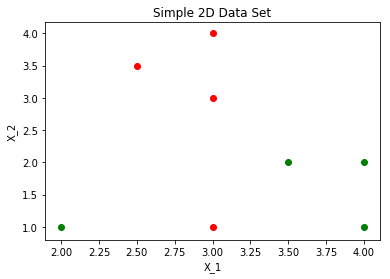

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline 

colors=('red','green')
for i in range(2):
    px = x[:, 1][d == i] # Only selects rows of the same class
    py = x[:, 2][d == i]
    plt.scatter(px, py, c=colors[i])

plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("Simple 2D Data Set")

This example also introduces another powerful Python library: matplotlib. To learn more, check out the following tutorial:

- <a href="https://matplotlib.org/3.1.1/tutorials/index.html">Matplotlib tutorial</a>

## Training

Training the Perceptron, that is finding appropriate values for $w$ and $b$ that separate the data into two classes, is a simple iterative process:

1. Initialize the weights with zeros or a small random number
2. Compute the prediction $y_j=f(wx_j+b)$ for each data point $x_j$. A suitable choice for $f()$ is the Heaviside step function, e.g.
3. Calculate the mismatch between prediction $y_j$ and the true class $d_j$ to update the weights
\begin{equation}
w(t+1)=w(t)+r(d_j-y_j)*x_j
\end{equation}

Repeat steps 2 and 3 until a termination criteria, such as a decreasing error or maximum number of iterations, is reached.

In [18]:
# Initializing the weights with zeros
w=np.zeros(x.shape[1])

# Initializing the perceptron predictions to zero
y=np.zeros(len(x))

# Perceptron learning parameters
r=10 # learning rate
iterations=100 # number of iterations

for i in range(iterations):
    for j in range(len(x)): # do this for every entry of x
        y[j]=np.heaviside(np.dot(w,x[j,:]),1) # calculate the dot product and implement the 
                                              # cut-off using the Heaviside function
        w=w+r*(d[j]-y[j])*x[j,:] # use learning rate to update weights
        
error=0;
for j in range(len(x)):
    error+=abs(d[j]-y[j])
error=error/len(x)

print('The error is ', error)
print('The weight vector is ', w)

The error is  0.125
The weight vector is  [ -60.   75. -100.]


### Geometric intepretation of the simple Perceptron
What is the geometric interpretation of the weight vector? It is a separating hyperplane, that is a 1D line when $m=2$. This can be seen as follows: writing the dot product out yields

\begin{equation}
w_1x_1+w_2x_2+b=0
\end{equation}

As we plot $x_1$ along the x-axis and $x_2$ along the y-axis, we can write

\begin{equation}
w_1x+w_2y+b=0
\end{equation}

This can be rewritten into
\begin{equation}
y=-\frac{w1}{w2}x-\frac{b}{w_2}
\end{equation}

and displayed within the scatter plot.


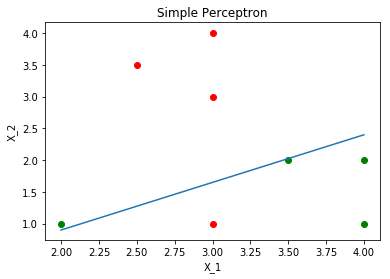

In [19]:

colors=('red','green')
for i in range(2):
    px = x[:, 1][d == i]
    py = x[:, 2][d == i]
    plt.scatter(px, py, c=colors[i])

plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("Simple Perceptron")

lx=np.linspace(min(x[:,1]),max(x[:,1]),100)
plt.plot(lx,-w[1]/w[2]*lx-w[0]/w[2])

Notice that the above algorithm works for any dimension of $m$, but only two dimensional data can reasonably be shown in a scatter plot.

## Observations and Exercises

- Learning is an iterative process, requiring parameters (learning rate). Learning can be instable (learning rate to high), learning is slow, requiring multiple presentations of the data-set. <i>Experiment with different values for the learning rate and number of iterations in the code above.</i>

- Each single perceptron can only contribute a straight hyperplane, more perceptrons are needed to piece more complex shapes together. <i>Experiment with additional data points. Can you find a configuration that cannot be separated by a curve?</i>

- The more data, the longer training takes.<i>Measure how much more time it takes when doubling the number of data points for a constant number of iterations (you can also do this by analyzing the algorithm.</i>

- Learning requires a termination criterion. Either the error is below a certain threshold, shrinks smaller than a certain rate, or a certain number of iterations is reached. <i>Experiment with the code. Can you plot the error vs. the number of iterations and thereby determine a suitable number of iterations?</i>

- The Heaviside function is a unit-step. A feature is therefore contributing only binary. This makes learning difficult, a smooth function might be better.<i>Think about the training algorithm. What else will need to change to train with a smooth activation function?</i>

- The error is only calculated based on training data. How does the algorithm generalize for new data?<i>Experiment with additonal data points and test your classifier.</i>




# Literature

<a href="https://psycnet.apa.org/record/1959-09865-001">Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.</a>

